# Imtegration benchmark

## Imports

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
import scanpy as sc
import numpy as np
import torch
from sklearn.metrics import mean_squared_error
from harmony import harmonize
import scvi
import DeepDive
import time
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection


In [1]:
import sys
sys.path.insert(0, "../utils")

In [ ]:
from integration import lsi, plot_result_table

## Parameters

In [ ]:
#DeepDive params
n_decoders = 5  
model_params = {
    'n_epochs_pretrain_ae' : 200*n_decoders,
    'n_decoders' : n_decoders
}
train_params = {
    'max_epoch' : 300*n_decoders, 
    'batch_size' : 512
}

## GCC

In [ ]:
adata = sc.read_h5ad("../data/Gestation_cerebral_cortex.h5ad")

In [ ]:
discrete_covriate_keys = ['Sample.ID']
adata.obs.columns = adata.obs.columns.map(lambda x:x.replace('.', ''))
discrete_covriate_keys = [x.replace('.', '') for x in discrete_covriate_keys]
adata.obs[discrete_covriate_keys] = adata.obs[discrete_covriate_keys].astype(str)

In [ ]:
lsi(adata)
adata.obsm['X_pca'] = adata.obsm['X_lsi']

In [ ]:
# Run harmony on lsi
har = adata.copy()
Z = harmonize(adata.obsm['X_lsi'], adata.obs, batch_key = discrete_covriate_keys[0], use_gpu = True)
har.obsm['X_pca'] = Z

In [ ]:
# Run DeepDive
dd = adata.copy()
model = DeepDive.DeepDive(adata = adata, 
                        discrete_covariate_names = discrete_covriate_keys,
                        **model_params
                       )
model.train_model(adata, None, 
                  **train_params)
basal = model.get_latent(adata, covars_to_add=[], )
dd.obsm['X_pca'] = basal.X

In [ ]:
pois = adata.copy()
scvi.external.POISSONVI.setup_anndata(adata, batch_key='SampleID')
model = scvi.external.POISSONVI(adata)
model.train(batch_size = 512*4)
latent = model.get_latent_representation()
pois.obsm['X_pca'] = latent

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_pca')
sc.pp.neighbors(har, use_rep = 'X_pca')
sc.pp.neighbors(dd, use_rep = 'X_pca')
sc.pp.neighbors(pois, use_rep = 'X_pca')


In [ ]:
adata.write_h5ad('../data/GCC_harmony_raw.h5ad')
har.write_h5ad('../data/GCC_harmony_integrated.h5ad')
dd.write_h5ad('../data/GCC_deepdive_integrated.h5ad')
pois.write_h5ad('../data/GCC_poissonvi_integrated.h5ad')

## NeuroIPS

In [ ]:
adata = sc.read_h5ad("../data/NeuroIPS.h5ad")

In [ ]:
discrete_covriate_keys = ['DonorID']
adata.obs.DonorID = adata.obs.DonorID.map(str)

In [ ]:
lsi(adata)
adata.obsm['X_pca'] = adata.obsm['X_lsi']

In [ ]:
# Run harmony on lsi
har = adata.copy()
Z = harmonize(adata.obsm['X_lsi'], adata.obs, batch_key = discrete_covriate_keys[0], use_gpu = True)
har.obsm['X_pca'] = Z

In [ ]:
# Run DeepDive
dd = adata.copy()
model = DeepDive.DeepDive(adata = adata, 
                        discrete_covariate_names = discrete_covriate_keys,
                        **model_params
                       )
model.train_model(adata, None, 
                  **train_params)
basal = model.get_latent(adata, covars_to_add=[], )
dd.obsm['X_pca'] = basal.X

In [ ]:
pois = adata.copy()
scvi.external.POISSONVI.setup_anndata(adata, batch_key='SampleID')
model = scvi.external.POISSONVI(adata)
model.train(batch_size = 512*4)
latent = model.get_latent_representation()
pois.obsm['X_pca'] = latent

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_pca')
sc.pp.neighbors(har, use_rep = 'X_pca')
sc.pp.neighbors(dd, use_rep = 'X_pca')
sc.pp.neighbors(pois, use_rep = 'X_pca')


In [ ]:
adata.write_h5ad('../data/neuroips_harmony_raw.h5ad')
har.write_h5ad('../data/neuroips_harmony_integrated.h5ad')
dd.write_h5ad('../data/neuroips_deepdive_integrated.h5ad')
pois.write_h5ad('../data/neuroips_poissonvi_integrated.h5ad')

## Kidney

In [ ]:
adata = sc.read_h5ad("../data/Kidney.h5ad")

In [ ]:
discrete_covriate_keys = ['sample']
adata.obs.columns = adata.obs.columns.map(lambda x:x.replace('.', ''))
discrete_covriate_keys = [x.replace('.', '') for x in discrete_covriate_keys]

In [ ]:
lsi(adata)
adata.obsm['X_pca'] = adata.obsm['X_lsi']

In [ ]:
# Run harmony on lsi
har = adata.copy()
Z = harmonize(adata.obsm['X_lsi'], adata.obs, batch_key = discrete_covriate_keys[0], use_gpu = True)
har.obsm['X_pca'] = Z

In [ ]:
# Run DeepDive
dd = adata.copy()
model = DeepDive.DeepDive(adata = adata, 
                        discrete_covariate_names = discrete_covriate_keys,
                        **model_params
                       )
model.train_model(adata, None, 
                  **train_params)
basal = model.get_latent(adata, covars_to_add=[], )
dd.obsm['X_pca'] = basal.X

In [ ]:
pois = adata.copy()
scvi.external.POISSONVI.setup_anndata(adata, batch_key='SampleID')
model = scvi.external.POISSONVI(adata)
model.train(batch_size = 512*4)
latent = model.get_latent_representation()
pois.obsm['X_pca'] = latent

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_pca')
sc.pp.neighbors(har, use_rep = 'X_pca')
sc.pp.neighbors(dd, use_rep = 'X_pca')
sc.pp.neighbors(pois, use_rep = 'X_pca')


In [ ]:
adata.write_h5ad('../data/kidney_harmony_raw.h5ad')
har.write_h5ad('../data/kidney_harmony_integrated.h5ad')
dd.write_h5ad('../data/kidney_deepdive_integrated.h5ad')
pois.write_h5ad('../data/kidney_poissonvi_integrated.h5ad')

## sciATAC3

In [ ]:
adata = sc.read_h5ad("../data/sciATAC3.h5ad")

In [ ]:
discrete_covriate_keys = ['donor_id']

In [ ]:
lsi(adata)
adata.obsm['X_pca'] = adata.obsm['X_lsi']

In [ ]:
# Run harmony on lsi
har = adata.copy()
Z = harmonize(adata.obsm['X_lsi'], adata.obs, batch_key = discrete_covriate_keys[0], use_gpu = True)
har.obsm['X_pca'] = Z

In [ ]:
# Run DeepDive
dd = adata.copy()
model = DeepDive.DeepDive(adata = adata, 
                        discrete_covariate_names = discrete_covriate_keys,
                        **model_params
                       )
model.train_model(adata, None, 
                  **train_params)
basal = model.get_latent(adata, covars_to_add=[], )
dd.obsm['X_pca'] = basal.X

In [ ]:
pois = adata.copy()
scvi.external.POISSONVI.setup_anndata(adata, batch_key='SampleID')
model = scvi.external.POISSONVI(adata)
model.train(batch_size = 512*4)
latent = model.get_latent_representation()
pois.obsm['X_pca'] = latent

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_pca')
sc.pp.neighbors(har, use_rep = 'X_pca')
sc.pp.neighbors(dd, use_rep = 'X_pca')
sc.pp.neighbors(pois, use_rep = 'X_pca')


In [ ]:
adata.write_h5ad('../data/sciATAC3_harmony_raw.h5ad')
har.write_h5ad('../data/sciATAC3_harmony_integrated.h5ad')
dd.write_h5ad('../data/sciATAC3_deepdive_integrated.h5ad')
pois.write_h5ad('../data/sciATAC3_poissonvi_integrated.h5ad')

## Pancreas

In [ ]:
adata = sc.read_h5ad("../data/Pancreas.h5ad")

In [ ]:
discrete_covriate_keys = ['donor']
adata.obs.columns = adata.obs.columns.map(lambda x:x.replace('.', ''))
discrete_covriate_keys = [x.replace('.', '') for x in discrete_covriate_keys]

In [ ]:
lsi(adata)
adata.obsm['X_pca'] = adata.obsm['X_lsi']

In [ ]:
# Run harmony on lsi
har = adata.copy()
Z = harmonize(adata.obsm['X_lsi'], adata.obs, batch_key = discrete_covriate_keys[0], use_gpu = True)
har.obsm['X_pca'] = Z

In [ ]:
# Run DeepDive
dd = adata.copy()
model = DeepDive.DeepDive(adata = adata, 
                        discrete_covariate_names = discrete_covriate_keys,
                        **model_params
                       )
model.train_model(adata, None, 
                  **train_params)
basal = model.get_latent(adata, covars_to_add=[], )
dd.obsm['X_pca'] = basal.X

In [ ]:
pois = adata.copy()
scvi.external.POISSONVI.setup_anndata(adata, batch_key='SampleID')
model = scvi.external.POISSONVI(adata)
model.train(batch_size = 512*4)
latent = model.get_latent_representation()
pois.obsm['X_pca'] = latent

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_pca')
sc.pp.neighbors(har, use_rep = 'X_pca')
sc.pp.neighbors(dd, use_rep = 'X_pca')
sc.pp.neighbors(pois, use_rep = 'X_pca')


In [ ]:
adata.write_h5ad('../data/pancreas_harmony_raw.h5ad')
har.write_h5ad('../data/pancreas_harmony_integrated.h5ad')
dd.write_h5ad('../data/pancreas_deepdive_integrated.h5ad')
pois.write_h5ad('../data/pancreas_poissonvi_integrated.h5ad')

## scIB

In [ ]:
biocons = BioConservation(isolated_labels=True, 
                          nmi_ari_cluster_labels_leiden=True, 
                          nmi_ari_cluster_labels_kmeans=False, 
                          silhouette_label=True, 
                          clisi_knn=True)
batchcor = BatchCorrection(bras=False, 
                           ilisi_knn=True, 
                           kbet_per_label=False, 
                           graph_connectivity=True, 
                           pcr_comparison=False)

In [ ]:
adata = sc.read_h5ad('../data/GCC_raw_raw.h5ad')
adata.obsm['harmony'] = sc.read_h5ad('../data/GCC_harmony_integrated.h5ad').obsm['X_pca']
adata.obsm['poissonvi'] = sc.read_h5ad('../data/GCC_poissonvi_integrated.h5ad').obsm['X_pca']
adata.obsm['deepdive'] = sc.read_h5ad('../data/GCC_DeepDive_integrated.h5ad').obsm['X_pca']

In [ ]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]
start = time.time()
bm = Benchmarker(
    adata,
    batch_key="SampleID",
    label_key="IterativeLSIClusters",
    embedding_obsm_keys=["Unintegrated", "harmony", "poissonvi", "deepdive"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=-1,
)
bm.prepare()
bm.benchmark()


In [ ]:
plot_results_table(bm, save_dir='results', dataset = 'GCC')
df = bm.get_results(min_max_scale=False)
df.to_csv('results/GCC.tsv', sep = '\t')

In [ ]:
adata = sc.read_h5ad('../data/kidney_raw_raw.h5ad')
adata.obsm['harmony'] = sc.read_h5ad('../data/kidney_harmony_integrated.h5ad').obsm['X_pca']
adata.obsm['poissonvi'] = sc.read_h5ad('../data/kidney_poissonvi_integrated.h5ad').obsm['X_pca']
adata.obsm['deepdive'] = sc.read_h5ad('../data/kidney_DeepDive_integrated.h5ad').obsm['X_pca']

In [ ]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

start = time.time()
bm = Benchmarker(
    adata,
    batch_key="sample",
    label_key="celltype",
    embedding_obsm_keys=["Unintegrated", "harmony", "poissonvi", "deepdive"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=-1,
)
bm.prepare()
bm.benchmark()


In [ ]:
plot_results_table(bm, save_dir='results', dataset = 'Kidney')
df = bm.get_results(min_max_scale=False)
df.to_csv('results/Kidney.tsv', sep = '\t')

In [ ]:
adata = sc.read_h5ad('../data/neuroips_raw_raw.h5ad')
adata.obsm['harmony'] = sc.read_h5ad('../data/neuroips_harmony_integrated.h5ad').obsm['X_pca']
adata.obsm['poissonvi'] = sc.read_h5ad('../data/neuroips_poissonvi_integrated.h5ad').obsm['X_pca']
adata.obsm['deepdive'] = sc.read_h5ad('../data/neuroips_DeepDive_integrated.h5ad').obsm['X_pca']

In [ ]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

start = time.time()
bm = Benchmarker(
    adata,
    batch_key="DonorID",
    label_key="cell_type",
    embedding_obsm_keys=["Unintegrated", "harmony", "poissonvi", "deepdive"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=-1,
)
bm.prepare()
bm.benchmark()


In [ ]:
plot_results_table(bm, save_dir='results', dataset = 'NeuroIPS')
df = bm.get_results(min_max_scale=False)
df.to_csv('results/NeuroIPS.tsv', sep = '\t')

In [ ]:
adata = sc.read_h5ad('../data/pancreas_raw_raw.h5ad')

In [ ]:
adata.obsm['harmony'] = sc.read_h5ad('../data/pancreas_harmony_integrated.h5ad').obsm['X_pca']
adata.obsm['poissonvi'] = sc.read_h5ad('../data/pancreas_poissonvi_integrated.h5ad').obsm['X_pca']
adata.obsm['deepdive'] = sc.read_h5ad('../data/pancreas_DeepDive_integrated.h5ad').obsm['X_pca']

In [ ]:
sc.pp.subsample(adata, n_obs=100_000)

In [ ]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

start = time.time()
bm = Benchmarker(
    adata,
    batch_key="donor",
    label_key="cell_type",
    embedding_obsm_keys=["Unintegrated", "harmony", "poissonvi", "deepdive"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=-1,
)
bm.prepare()
bm.benchmark()

In [ ]:
adata = sc.read_h5ad('../data/sciATAC3_raw_raw.h5ad')

In [ ]:
adata.obsm['harmony'] = sc.read_h5ad('../data/sciATAC3_harmony_integrated.h5ad').obsm['X_pca']
adata.obsm['poissonvi'] = sc.read_h5ad('../data/sciATAC3_poissonvi_integrated.h5ad').obsm['X_pca']
adata.obsm['deepdive'] = sc.read_h5ad('../data/sciATAC3_DeepDive_integrated.h5ad').obsm['X_pca']

In [ ]:
sc.pp.subsample(adata, n_obs=100_000)


In [ ]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

start = time.time()
bm = Benchmarker(
    adata,
    batch_key="donor_id",
    label_key="cell_type",
    embedding_obsm_keys=["Unintegrated", "harmony", "poissonvi", "deepdive"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=-1,
)
bm.prepare()
bm.benchmark()

In [ ]:
plot_results_table(bm, save_dir='results', dataset = 'sciATAC3')
df = bm.get_results(min_max_scale=False)
df.to_csv('results/sciATAC3.tsv', sep = '\t')

In [2]:
def make_float(v):
    try: 
        return v.map(float)
    except:
        return v

In [3]:
files = glob.glob('integration/*.tsv', root_dir='../results')
results = []
for f in files:
    dataset = f.split('/')[-1].split('.')[0]
    res = pd.read_csv('../results/'+f, sep = '\t')
    res['dataset'] = dataset
    res = res[res['Embedding'] != 'Metric Type']
    res = res.apply(lambda x: make_float(x))
    results.append(res.T)
    
results = pd.concat(results, axis = 1).T
order = ['Unintegrated', 'harmony', 'deepdive', 'poissonvi']

In [4]:
pairs = [
    ("Unintegrated", "harmony"),
    ("Unintegrated", "deepdive"),
    ("Unintegrated", "poissonvi"),
    ("harmony", "deepdive"),
    ("harmony", "poissonvi"),
    ("deepdive", "poissonvi"),
]

df = results.copy()
df['method'] = df['Embedding']
df['score'] = df['Batch correction']
df["score"] = df["score"].astype(float)
results_test = []
for g1, g2 in pairs:
    vals1 = df.loc[df["method"] == g1, "score"]
    vals2 = df.loc[df["method"] == g2, "score"]
    stat, pval = ttest_ind(vals1, vals2, equal_var=True)  # Welch’s t-test
    results_test.append({"pair": (g1, g2), "stat": stat, "pval": pval})

results_df = pd.DataFrame(results_test)
print(results_df)


                        pair      stat      pval
0    (Unintegrated, harmony) -0.167814  0.870894
1   (Unintegrated, deepdive) -2.474634  0.038432
2  (Unintegrated, poissonvi) -2.703883  0.026912
3        (harmony, deepdive) -2.270718  0.052831
4       (harmony, poissonvi) -2.522665  0.035660
5      (deepdive, poissonvi) -0.424704  0.682244


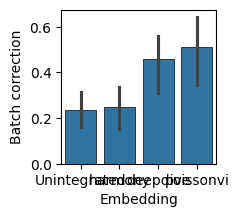

In [5]:
fig, ax = plt.subplots(1,1, figsize = (2,2))

sns.barplot(data = results, x = 'Embedding', 
            y = 'Batch correction', 
            edgecolor = 'k', linewidth = 0.5,
            order = order)

x = 'Embedding'
y = 'Batch correction'
plt.savefig('../figures/F1F.pdf')

In [6]:
pairs = [
    ("Unintegrated", "harmony"),
    ("Unintegrated", "deepdive"),
    ("Unintegrated", "poissonvi"),
    ("harmony", "deepdive"),
    ("harmony", "poissonvi"),
    ("deepdive", "poissonvi"),
]

df = results.copy()
df['method'] = df['Embedding']
df['score'] = df['Bio conservation']
df["score"] = df["score"].astype(float)
results_test = []
for g1, g2 in pairs:
    vals1 = df.loc[df["method"] == g1, "score"]
    vals2 = df.loc[df["method"] == g2, "score"]
    stat, pval = ttest_ind(vals1, vals2, equal_var=True)  # Welch’s t-test
    results_test.append({"pair": (g1, g2), "stat": stat, "pval": pval})

results_df = pd.DataFrame(results_test)
print(results_df)


                        pair      stat      pval
0    (Unintegrated, harmony)  0.033474  0.974116
1   (Unintegrated, deepdive)  0.339692  0.742834
2  (Unintegrated, poissonvi) -0.351926  0.733984
3        (harmony, deepdive)  0.296362  0.774502
4       (harmony, poissonvi) -0.374543  0.717734
5      (deepdive, poissonvi) -0.705014  0.500809


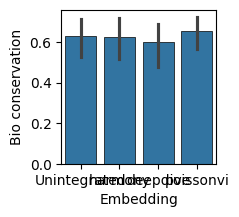

In [7]:
fig, ax = plt.subplots(1,1, figsize = (2,2))

sns.barplot(data = results, x = 'Embedding', 
            y = 'Bio conservation', 
            edgecolor = 'k', linewidth = 0.5,
            order = ['Unintegrated', 'harmony', 'deepdive', 'poissonvi'])
plt.savefig('../figures/S4H.pdf')